In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
x_train = np.array([1.0, 2.0]) #Features
y_train = np.array([300.0, 500.0]) #Target variables

In [23]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  #We are using Square Error Cost here
  for i in range(m):
    fwb = w* x[i] + b
    cost = cost + (fwb - y[i])**2
  total_cost = 1/(2*m) * cost

  return total_cost


In [24]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    fwb = w * x[i] + b
    dj_dw_i = (fwb-y[i])*x[i]
    dj_db_i = (fwb-y[i])
    dj_db += dj_db_i
    dj_dw += dj_dw_i
  dj_dw /= m
  dj_db /= m

  return dj_dw, dj_db

In [25]:
import copy
import math

In [26]:
def gradient_descent(w_in, b_in, x, y, alpha, itr, f_compute_cost, f_compute_gradient):
  w = copy.deepcopy(w_in)
  J_history = []
  p_history = []
  w = w_in
  b = b_in

  for i in range(itr):
    dj_dw, dj_db = f_compute_gradient(x, y, w, b)
    b-= alpha * dj_db
    w -= alpha * dj_dw

    if i<10000:
      J_history.append(f_compute_cost(x, y, w, b))
      p_history.append([w, b])

    if i% math.ceil(itr/10) == 0:
      print(f"Iteration : {i:4}, Cost : {J_history[-1]:0.2e}, w : {w:0.3f}, b : {b:0.5f}")

  return w, b, J_history, p_history


In [33]:
w_init = 0
b_init = 0
n = 10000
alpha_t = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(w_init, b_init, x_train, y_train, alpha_t, n, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration :    0, Cost : 7.93e+04, w : 6.500, b : 4.00000
Iteration : 1000, Cost : 3.41e+00, w : 194.915, b : 108.22799
Iteration : 2000, Cost : 7.93e-01, w : 197.549, b : 103.96611
Iteration : 3000, Cost : 1.84e-01, w : 198.818, b : 101.91177
Iteration : 4000, Cost : 4.28e-02, w : 199.430, b : 100.92152
Iteration : 5000, Cost : 9.95e-03, w : 199.725, b : 100.44420
Iteration : 6000, Cost : 2.31e-03, w : 199.868, b : 100.21412
Iteration : 7000, Cost : 5.37e-04, w : 199.936, b : 100.10321
Iteration : 8000, Cost : 1.25e-04, w : 199.969, b : 100.04975
Iteration : 9000, Cost : 2.90e-05, w : 199.985, b : 100.02398
(w,b) found by gradient descent: (199.9929,100.0116)


In [28]:
#Predictions

In [34]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


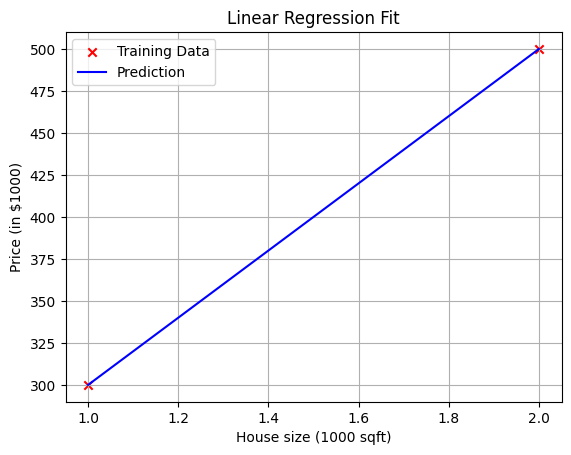

In [35]:
# Plotting the training data
plt.scatter(x_train, y_train, color='red', marker='x', label='Training Data')

# Plotting the line predicted by the model
x_model = np.linspace(min(x_train), max(x_train), 100)
y_model = w_final * x_model + b_final
plt.plot(x_model, y_model, color='blue', label='Prediction')

# Labels and Title
plt.xlabel("House size (1000 sqft)")
plt.ylabel("Price (in $1000)")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()
